In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas as pd
from pathlib import Path
sns.set()
sns.set_palette('colorblind');

In [13]:
logfile = '/data/logs/2018-03-20-1824-bigmodel-b1/2018-03-20-1824-bigmodel-b1/bigmodel_mlp_nolim/run_2/rep{:02}/logall_10999.txt'

In [14]:
i = 0
ok = True
logs = []
while ok:
    try:
        logs.append(pd.read_csv(logfile.format(i), delimiter="\t"))
    except:
        ok = False
    else:
        i += 1
log = pd.concat(logs)
    
log

,eval,iter,id,a,onOpp,nbOnOpp,curCoop,meanOwn,meanTotal
0,0,0,0,6.680740,0,0,0.000000,0.000000,0.00000
1,0,0,1,5.039620,0,0,0.000000,1.746750,3.32223
2,0,0,2,3.391920,0,0,0.000000,0.386274,2.38268
3,0,0,3,4.219340,0,0,0.000000,0.000000,0.00000
4,0,0,4,7.676360,0,0,0.000000,1.798200,2.85226
5,0,0,5,2.848590,0,0,0.000000,0.413239,1.21151
6,0,0,6,5.858260,0,0,0.000000,2.318230,2.60805
7,0,0,7,3.962230,0,0,0.000000,2.892680,2.89268
8,0,0,8,4.914870,0,0,0.000000,0.567553,2.91121
9,0,0,9,0.010000,0,0,0.000000,0.000000,0.00000


In [15]:
on_opp = log.query('onOpp == 1 and nbOnOpp >= 2')
on_opp.head(10)

,eval,iter,id,a,onOpp,nbOnOpp,curCoop,meanOwn,meanTotal
350,0,11,20,8.34103,1,2,4.243970,4.406140,4.69851
352,0,11,22,6.74553,1,2,2.923680,2.923680,7.16765
380,0,12,20,8.34103,1,2,4.438840,4.182320,4.50488
382,0,12,22,6.74553,1,2,0.301938,1.612810,5.95421
410,0,13,20,8.34103,1,2,4.441680,4.254750,4.61074
412,0,13,22,6.74553,1,2,0.334287,1.186630,5.56147
440,0,14,20,8.34103,1,2,4.440600,4.287880,4.67939
442,0,14,22,6.74553,1,2,0.355162,0.978766,5.37004
470,0,15,20,8.34103,1,2,4.439930,4.314000,4.74233
472,0,15,22,6.74553,1,2,0.368245,0.856662,5.25767


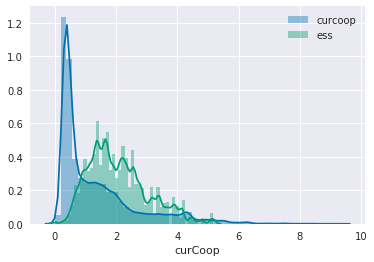

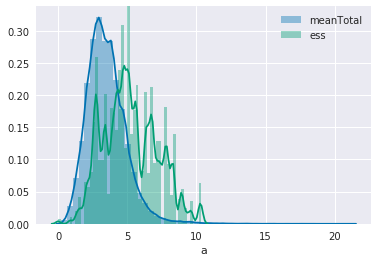

In [16]:
sns.distplot(on_opp['curCoop'], label="curcoop")
sns.distplot(on_opp['a']/on_opp['nbOnOpp'], label="ess")
plt.legend()
plt.figure()
sns.distplot(on_opp['meanTotal'], label="meanTotal")
sns.distplot(on_opp['a'], label="ess")
plt.legend();


In [17]:
print(scipy.stats.normaltest(on_opp['curCoop']))
print(scipy.stats.normaltest(on_opp['a']))

NormaltestResult(statistic=91118.44814189317, pvalue=0.0)
NormaltestResult(statistic=8297.377125436831, pvalue=0.0)


Not normal, so wilcoxon

In [18]:
scipy.stats.wilcoxon(on_opp['curCoop'], on_opp['a']/on_opp['nbOnOpp'])

WilcoxonResult(statistic=7000978515.0, pvalue=0.0)

In [11]:
on_opp['curCoop'].median(), (on_opp['a']/on_opp['nbOnOpp']).median()

(1.51186, 1.6007200000000001)

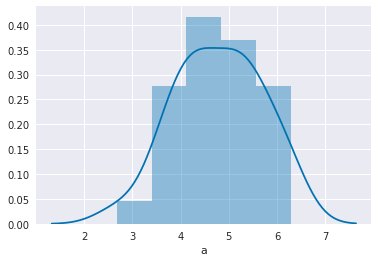

In [12]:
sns.distplot(log.groupby('id').mean()['a'])